In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

import prepare
import model

# Prep for modeling using additional SMOTE+Tomek resampling

In [2]:
# clean original dataset up to explore stage
df = prepare.prep_data(pd.read_csv('healthcare-dataset-stroke-data.csv'))
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-70
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.6,never smoked,1,60-65
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75-80


In [3]:
# encode, split, scale, SMOTE the explore-stage data
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.model_prep(df)
# check results
print('X_train with SMOTE:', X_train.shape)
print('y_train with SMOTE:', y_train.shape)
print('X_validate:', X_validate.shape)
print('y_validate:', y_validate.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Before SMOTE applied: (3065, 31) (3065,)
After SMOTE applied: (5812, 31) (5812,)
X_train with SMOTE: (5812, 31)
y_train with SMOTE: (5812,)
X_validate: (1022, 31)
y_validate: (1022,)
X_test: (1022, 31)
y_test: (1022,)


In [4]:
X_train # features like gender_Male and work_type_Private have non-ordinal values because of SMOTE oversampling

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,age_range_40-45,age_range_45-50,age_range_5-10,age_range_50-55,age_range_55-60,age_range_60-65,age_range_65-70,age_range_70-75,age_range_75-80,age_range_80-85
0,0.792480,0.0,0.0,0.415613,0.227662,1.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.00000
1,0.951172,0.0,0.0,0.710322,0.258262,0.000000,1.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.00000
2,0.572754,0.0,0.0,0.253993,0.247246,1.000000,1.0,0.0,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
3,0.682617,0.0,0.0,0.326609,0.175031,1.000000,1.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.00000
4,0.890137,0.0,0.0,0.065691,0.243574,0.000000,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.910190,0.0,0.0,0.209272,0.166422,1.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.678623,0.321377,0.00000
5808,0.928368,1.0,0.0,0.084255,0.170208,0.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.695440,0.000000,0.30456
5809,0.731440,0.0,1.0,0.722097,0.260709,0.749896,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.250104,0.749896,0.0,0.000000,0.000000,0.00000
5810,0.853516,0.0,1.0,0.123190,0.259796,0.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.00000


# Build models using model.py functions

In [5]:
# shotgun-out several classification models
y_train_predictions,\
y_validate_predictions = model.classification_shotgun(X_train, y_train, X_validate, y_validate)

In [6]:
# choose the baseline guess manually
y_train_predictions,\
y_validate_predictions = model.manual_baseline(y_train_predictions, y_validate_predictions, 1)

## Check prediction columns

In [7]:
y_train_predictions # each model's predictions and the actuals column (in_actuals)

,in_actuals,baseline,tree_maxdepth1,tree_maxdepth2,tree_maxdepth3,tree_maxdepth5,tree_maxdepth10,rf_depth1,rf_depth2,rf_depth3,...,nb_vsmooth0.001,nb_vsmooth0.01,nb_vsmooth10,nb_vsmooth100,knn_n3,knn_n5,knn_n10,knn_n25,knn_n75,manual_baseline
0,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,0,0,0,0,1,1
1,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,0,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1
4,0,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5808,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5809,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5810,1,0,1,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Run model predictions through an evaluation function in model.py

In [8]:
# calculate accuracy and recall for in- and out-sample predictions
running_df = model.print_classification_results(y_train_predictions, y_validate_predictions)

In [9]:
# display accuracies and recalls for each model, sorting for best out-sample recall
running_df.sort_values(by=['OutSample_Recall','OutSample_Accuracy'], ascending=False)

,Model,InSample_Accuracy,OutSample_Accuracy,InSample_Recall,OutSample_Recall
14,nb_vsmooth1e-07,0.701136,0.449119,0.990021,1.000000
13,nb_vsmooth1e-08,0.691672,0.434442,0.990365,1.000000
12,nb_vsmooth1e-09,0.691156,0.432485,0.990709,1.000000
27,manual_baseline,0.500000,0.043053,1.000000,1.000000
3,tree_maxdepth3,0.813145,0.783757,0.879215,0.977273
1,tree_maxdepth1,0.787853,0.746575,0.868548,0.977273
2,tree_maxdepth2,0.787853,0.746575,0.868548,0.977273
19,nb_vsmooth0.01,0.747763,0.590020,0.945974,0.977273
18,nb_vsmooth0.001,0.748624,0.585127,0.955609,0.977273
17,nb_vsmooth0.0001,0.752409,0.582192,0.966621,0.977273


# Implement ROC Curve
- A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.
- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
- It can be more flexible to predict the probabilities for each class instead of predicting the outcome itself. 
    * The reason for this is to provide the capability to choose and even **calibrate the threshold** for how to interpret the predicted probabilities.
     * For example, a default might be to use a threshold of 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1).

In [10]:
bl_probs = [0 for _ in range(len(y_train))]
tree = DecisionTreeClassifier(max_depth=3, random_state=123).fit(X_train, y_train)

In [11]:
# THRESHOLD = .60
# preds = np.where(tree.predict_proba(X_train) > THRESHOLD, 1, 0)
# tree_probs = preds[:, 1]
tree_probs = tree.predict_proba(X_train)
tree_probs = tree_probs[:, 1]

In [12]:
bl_auc = roc_auc_score(y_train, bl_probs)
tree_auc = roc_auc_score(y_train, tree_probs)

In [13]:
print('Baseline: ROC AUC=%.3f' % (bl_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

Baseline: ROC AUC=0.500
DecisionTreeClassifier: ROC AUC=0.872


In [14]:
bl_fpr, bl_tpr, _ = roc_curve(y_train, bl_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_train, tree_probs)
print("x axis:")
print(tree_fpr.round(5).tolist())
print("y axis:")
print(tree_tpr.round(5).tolist())

x axis:
[0.0, 0.0, 0.01824, 0.12251, 0.25292, 0.46869, 0.5086, 1.0]
y axis:
[0.0, 0.02099, 0.24054, 0.62801, 0.87922, 0.97213, 0.98245, 1.0]


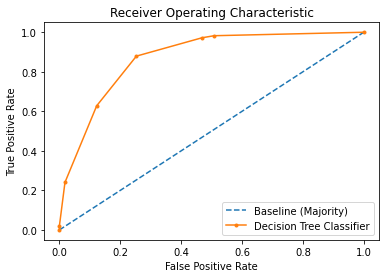

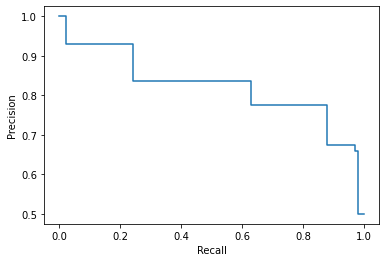

In [15]:
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='Baseline (Majority)')
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()
# plot the precision-recall curve for the model
precision, recall, _ = precision_recall_curve(y_train, tree_probs)
disp = PrecisionRecallDisplay(precision = precision, recall = recall)
disp.plot()

## Titanic Example for implementing ROC Curve

In [16]:
# from seaborn import load_dataset
# from sklearn import svm
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [17]:
# # Import some data to play with
# titanic = load_dataset("titanic")
# titanic = titanic[['parch', 'sibsp','age', 'survived']].dropna()
# X = titanic.drop(columns=['survived'])
# y = titanic.survived

In [18]:
# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [19]:
# # get the majority class
# y_train.value_counts(normalize=True)

In [20]:
# # generate a baseline (majority class)
# bl_probs = [0 for _ in range(len(y_train))]
# # bl_probs[0:5]

In [21]:
# # fit classifier
# classifier = svm.SVC(kernel="linear", probability=True, random_state=123)
# classifier = classifier.fit(X_train, y_train)

In [22]:
# # get predicted probabilities
# THRESHOLD = .40
# preds = np.where(classifier.predict_proba(X_train) > THRESHOLD, 1, 0)
# # We want only the probability for the "true" outcome (1)
# # keep probablities for the positive outcome (the 1) only
# svc_probs = preds[:, 1]
# # svc_probs[0:5]

In [23]:
# # calculate scores
# bl_auc = roc_auc_score(y_train, bl_probs)
# svc_auc = roc_auc_score(y_train, svc_probs)

In [24]:
# # summarize scores
# print('Baseline: ROC AUC=%.3f' % (bl_auc))
# print('SVC: ROC AUC=%.3f' % (svc_auc))

In [25]:
# # calculate roc curves
# bl_fpr, bl_tpr, _ = roc_curve(y_train, bl_probs)
# svc_fpr, svc_tpr, _ = roc_curve(y_train, svc_probs)

In [26]:
# # plot the roc curve for the model
# import matplotlib.pyplot as plt
# plt.plot(bl_fpr, bl_tpr, linestyle='--', label='Baseline (Majority)')
# plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Classifier')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver Operating Characteristic")
# plt.legend(loc="lower right")
# plt.show()
# # plot the precision-recall curve for the model
# precision, recall, _ = precision_recall_curve(y_train, svc_probs)
# disp = PrecisionRecallDisplay(precision = precision, recall = recall)
# disp.plot()

# Feature Engineering - Multivariate

In [27]:
# reset, re-split data
df = prepare.prep_data(pd.read_csv('healthcare-dataset-stroke-data.csv'))
trainvalidate, test = train_test_split(df, test_size=.2, random_state=777)
train, validate = train_test_split(trainvalidate, test_size=.25, random_state=777)

train.shape, validate.shape, test.shape

((3065, 12), (1022, 12), (1022, 12))

## What puts a child most at-risk for stroke?

In [28]:
# focus on subset for people under age 18
children = train[train.age < 18]
children.stroke.value_counts()

0    519
1      2
Name: stroke, dtype: int64

### Results
> Not enough observations to conduct analysis.

## What features do not seem to be risk factors?
- Male/Female: Similar proportion difference, likely not a factor
- **Age**: No-stroke has a normal age distribution, stroke is extremely left-skewed and not normal
- **Hypertension**: Stroke has a much higher proportion of hypertension than no-stroke
    * Across all age groups? Is hypertension rising, or not-hypertension falling?
- **Heart Disease**: Stroke has a much higher proportion of heart disease than no-stroke
    * Across all age groups? Is heart disease rising or not-heart disease falling?
- **Marriage**: Stroke has a much higher proportion of married than not-stroke
    * Higher proportion of marriages at older ages? Is married rising or not-married falling?
- work_type: **Split into 4 separate features**
    * 'children' much less likely (purely because of age?)
    * 'Govt_job' less likely (others rising?)
    * 'self_employed' slightly more likely (others falling?)
    * 'private' slightly less likely (others rising?)
- **residence_type**: Stroke has a higher proportion of Urban than not-stroke
    * Younger people are Urban? 
- **average_glucose_level**: **125 is the split point (2 feature groups)** for higher: more likely, lower: less likely
    * Is this independent of other features? Other features may be driving this *and* stroke
- bmi: Hard to tell from the left-right comparison graph, **split into 10 groups**
- **smoking_status**: Stroke has much higher proportion of formerly_smoked, higher proportion of smokes **(2 features)**
    * Consider age (legal smokers, more time to pick it up, more time to pick it up and stop, etc)

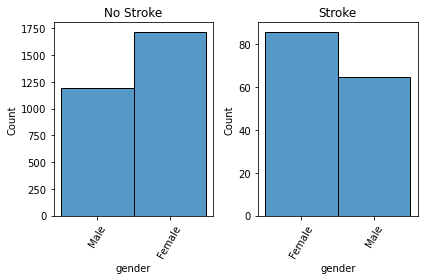

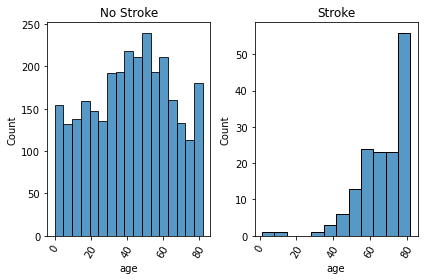

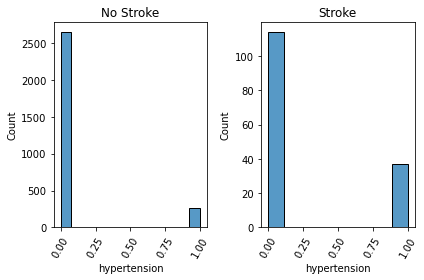

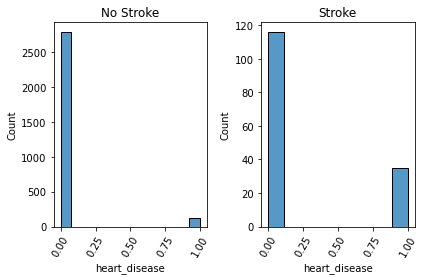

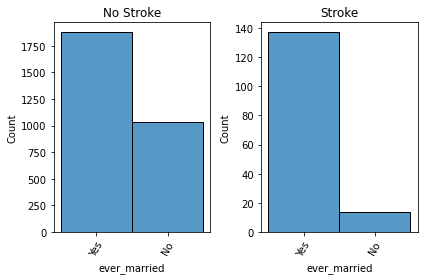

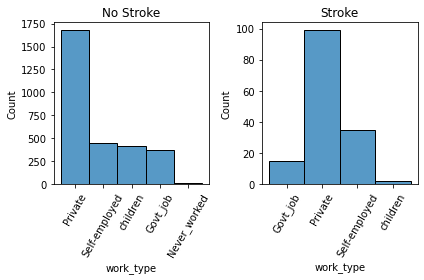

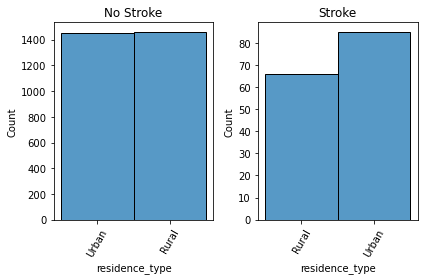

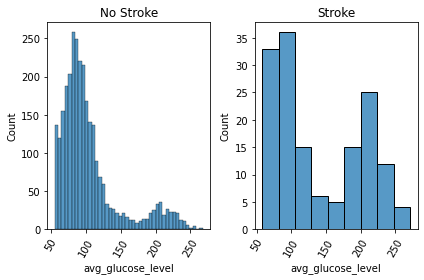

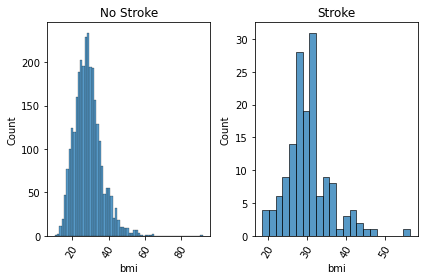

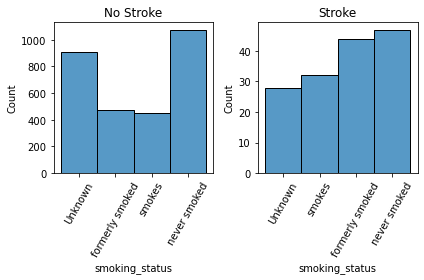

In [29]:
# initial chart look (looking for differences betwen left chart and right chart for each)
for col in train.columns[:-2]:
    plt.subplot(121) # Observations without stroke (left charts)
    plt.title('No Stroke')
    sns.histplot(train[train.stroke == 0][col])
    plt.xticks(rotation=60)
    plt.subplot(122) # Observations with stroke (right charts)
    plt.title('Stroke')
    sns.histplot(train[train.stroke == 1][col])
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

In [30]:
# feature splitting (employment types, glucose less/greater than 125, bmi 10 groups using pd.cut)
# work type
train['govt_job'] = train['work_type'] == 'Govt_job'
train['self_employed'] = train['work_type'] == 'Self-employed'
train['private_work'] = train['work_type'] == 'Private'
train['never_worked'] = (train['work_type'] == 'children') | (train['work_type'] == 'Never_worked')
# glucose
train['high_glucose'] = train['avg_glucose_level'] >= 125
# smoker
train['current_smoker'] = train['smoking_status'] == 'smokes'
train['prior_smoker'] = train['smoking_status'] == 'formerly smoked'
train['never_smoked'] = train['smoking_status'] == 'never smoked'
# bmi
bmi_bins = [0,10,20,30,40,50,60,70,80,90,100]
bmi_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
train['bmi_range'] = pd.cut(train.bmi, bins=bmi_bins, labels=bmi_labels)

# drop old columns
train.drop(columns=['work_type','avg_glucose_level','smoking_status','bmi'], inplace=True)
train.head(3)

,gender,age,hypertension,heart_disease,ever_married,residence_type,stroke,age_range,govt_job,self_employed,private_work,never_worked,high_glucose,current_smoker,prior_smoker,never_smoked,bmi_range
448,Male,65.0,0,0,Yes,Urban,0,60-65,False,False,True,False,True,False,False,False,20-29
4128,Female,78.0,0,0,Yes,Rural,0,75-80,False,True,False,False,True,False,True,False,30-39
4699,Male,47.0,0,0,Yes,Rural,0,45-50,False,False,True,False,False,True,False,False,30-39


In [31]:
# 2 sample t-test function
def ttest_me(sample1, sample2):
    g_t, g_p = stats.mannwhitneyu(sample1, sample2, alternative='greater')
    l_t, l_p = stats.mannwhitneyu(sample1, sample2, alternative='less')
    return g_t, g_p, l_t, l_p

In [32]:
# create the two samples
stroke_vals = train[train['stroke'] == True]
non_stroke_vals = train[train['stroke'] == False]

# create empty dataframe
results_df = pd.DataFrame(columns=['feature', 'test', 't-stat', 'p-value'])
# loop through columns
for col in train.columns[:-2]:
    # run t-tests
    g_t, g_p, l_t, l_p = ttest_me(stroke_vals[col], non_stroke_vals[col])
    # put results to dataframe
    results_df = results_df.append({'feature':col, 'test':'True is more at risk than False', 't-stat':g_t, 'p-value':round(g_p, 3)}, ignore_index=True)
    results_df = results_df.append({'feature':col, 'test':'True is less at risk than False', 't-stat':l_t, 'p-value':round(l_p, 3)}, ignore_index=True)
    
# output results that passed 95% confidence level 
alpha = .05
print('Features and MannWhitneyU Test Results')
print('-'*50)
results_df

Features and MannWhitneyU Test Results
--------------------------------------------------


,feature,test,t-stat,p-value
0,gender,True is more at risk than False,224565.0,0.307
1,gender,True is less at risk than False,224565.0,0.693
2,age,True is more at risk than False,362586.5,0.000
3,age,True is less at risk than False,362586.5,1.000
4,hypertension,True is more at risk than False,253833.0,0.000
5,hypertension,True is less at risk than False,253833.0,1.000
6,heart_disease,True is more at risk than False,261413.5,0.000
7,heart_disease,True is less at risk than False,261413.5,1.000
8,ever_married,True is more at risk than False,277902.5,0.000
9,ever_married,True is less at risk than False,277902.5,1.000


# Independence Tests
- pd.crosstab against two *categorical* columns, then stats.chi2_contingency of that dataframe (returns chi2, pvalue, degf, expected_values_array)
- Degree of Freedom: (num_cols - 1) * (num_rows - 1)
- Check df for potential categorical columns: df.nunique() ----- returns count of unique values for each column, if column has low count then good chance it's categorical

In [33]:
cat_cols = ['gender',
            'hypertension',
            'heart_disease',
            'ever_married',
            'residence_type',
            'age_range',
            'govt_job',
            'self_employed',
            'private_work',
            'never_worked',
            'high_glucose',
            'current_smoker',
            'prior_smoker',
            'never_smoked',
            'bmi_range']

In [34]:
chi2_results_df = pd.DataFrame({'col1':[], 'col2':[], 'chi2':[], 'p':[], 'degf':[], 'expected':[]})

for col1 in cat_cols:
    for col2 in cat_cols:
        chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train[col1], train[col2]))
        chi2_results_df = chi2_results_df.append({'col1':col1, 
                                                  'col2':col2, 
                                                  'chi2':chi2, 
                                                  'p':p, 
                                                  'degf':degf, 
                                                  'expected':expected},
                                                  ignore_index=True)


In [35]:
mask = chi2_results_df.col1 != chi2_results_df.col2
chi2_results_df = chi2_results_df[mask].reset_index(drop=True)

In [36]:
mask2 = chi2_results_df.p < .05
good_checks = chi2_results_df[mask2]
mask3 = chi2_results_df.p > .05
failed_checks = chi2_results_df[mask3]

In [37]:
good_checks[good_checks.col1 == 'age_range']

,col1,col2,chi2,p,degf,expected
70,age_range,gender,47.944059,4.847040e-05,16.0,"[[113.72202283849919, 79.27797716150081], [81...."
71,age_range,hypertension,254.485861,6.215414e-45,16.0,"[[173.92039151712888, 19.079608482871127], [12..."
72,age_range,heart_disease,277.204990,1.312206e-49,16.0,"[[182.79902120717782, 10.200978792822186], [13..."
73,age_range,ever_married,1891.413684,0.000000e+00,16.0,"[[66.18042414355628, 126.81957585644372], [47...."
74,age_range,residence_type,28.233513,2.964735e-02,16.0,"[[96.1536704730832, 96.8463295269168], [68.752..."
75,age_range,govt_job,146.366132,4.059142e-23,16.0,"[[169.00880913539967, 23.991190864600327], [12..."
76,age_range,self_employed,351.339859,5.439070e-65,16.0,"[[162.8378466557912, 30.16215334420881], [116...."
77,age_range,private_work,727.073071,2.227998e-144,16.0,"[[81.04110929853181, 111.95889070146819], [57...."
78,age_range,never_worked,2727.906814,0.000000e+00,16.0,"[[166.11223491027732, 26.887765089722674], [11..."
79,age_range,high_glucose,176.220490,4.813510e-29,16.0,"[[155.4704730831974, 37.52952691680261], [111...."


In [38]:
print(failed_checks.shape)
failed_checks[failed_checks.col1 == 'gender']

(62, 6)


,col1,col2,chi2,p,degf,expected
0,gender,hypertension,0.139626,0.708653,1.0,"[[1627.462316476346, 178.53768352365415], [113..."
3,gender,residence_type,0.743270,0.388615,1.0,"[[899.7592169657422, 906.2407830342578], [627...."
5,gender,govt_job,0.012331,0.911581,1.0,"[[1581.5021207177815, 224.4978792822186], [110..."
6,gender,self_employed,0.876090,0.349275,1.0,"[[1523.7572593800978, 282.2427406199021], [106..."
9,gender,high_glucose,3.003831,0.083068,1.0,"[[1454.816965742251, 351.1830342577488], [1014..."
10,gender,current_smoker,1.632161,0.201404,1.0,"[[1520.811092985318, 285.1889070146819], [1060..."


In [39]:
print(pd.crosstab(train.gender, train.heart_disease))
print('')
print(pd.crosstab(train.gender, train.hypertension))

heart_disease     0   1
gender                 
Female         1739  67
Male           1164  95

hypertension     0    1
gender                 
Female        1631  175
Male          1131  128


In [40]:
175 / 1631

0.1072961373390558

In [41]:
128 / 1131

0.11317418213969938

In [42]:
67 / 1739

0.03852788959171938

In [43]:
(95 / 1164) / (67 / 1739)

2.118338718777248

In [44]:
import maggies_explore

In [45]:
target = 'stroke'
quant_cols = ['age','avg_glucose_level','bmi']
cat_cols = ['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status']

In [46]:
# reset, re-split data
df = prepare.prep_data(pd.read_csv('healthcare-dataset-stroke-data.csv'))
trainvalidate, test = train_test_split(df, test_size=.2, random_state=777)
train, validate = train_test_split(trainvalidate, test_size=.25, random_state=777)

train.shape, validate.shape, test.shape

((3065, 12), (1022, 12), (1022, 12))

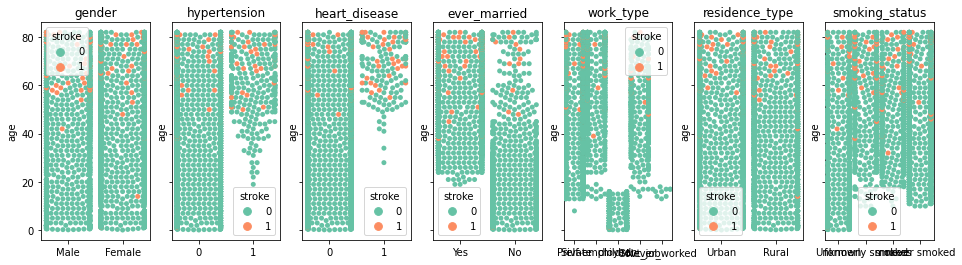

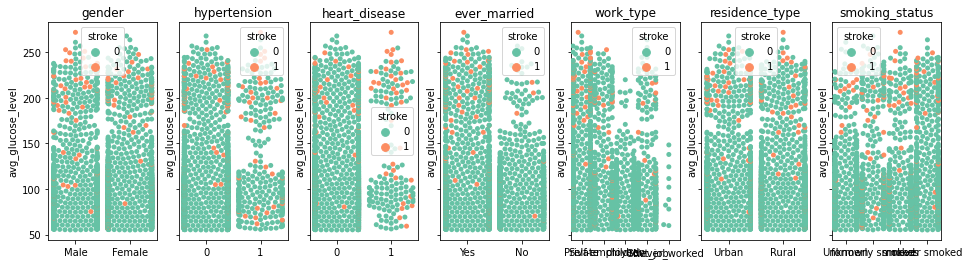

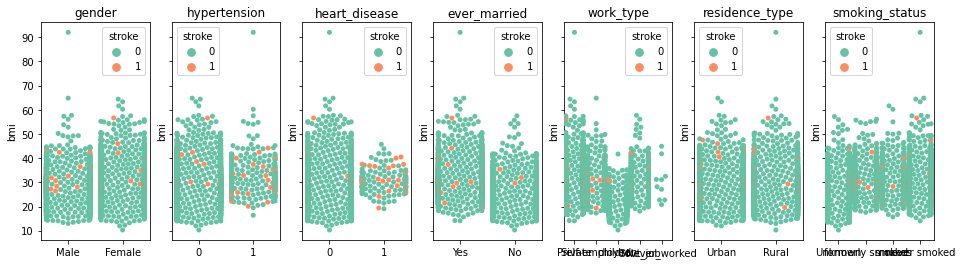

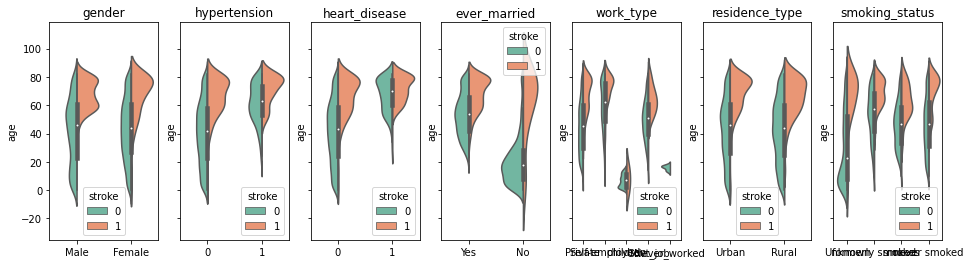

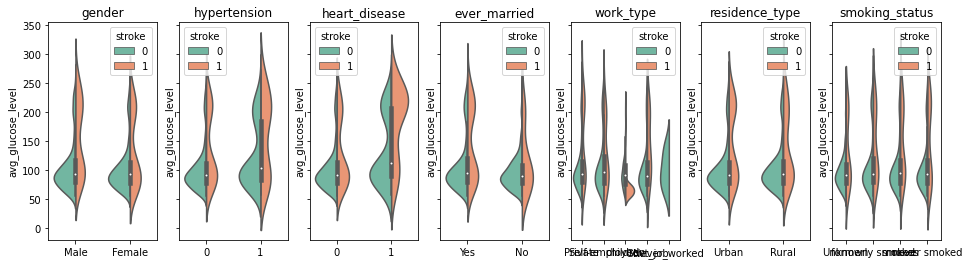

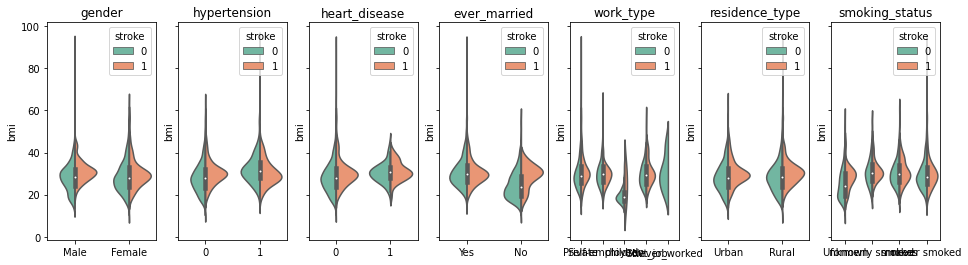

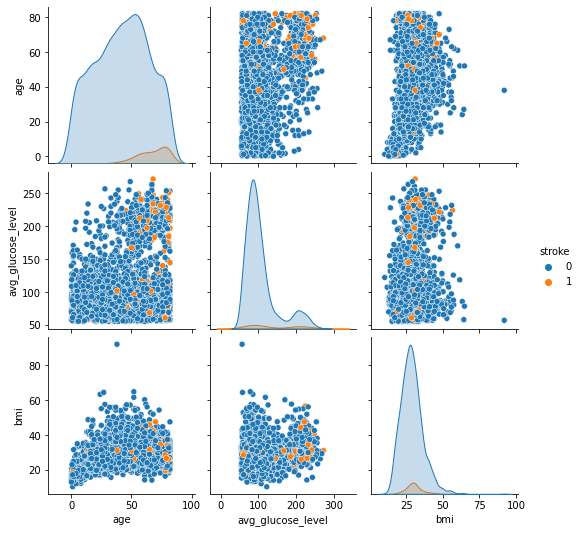

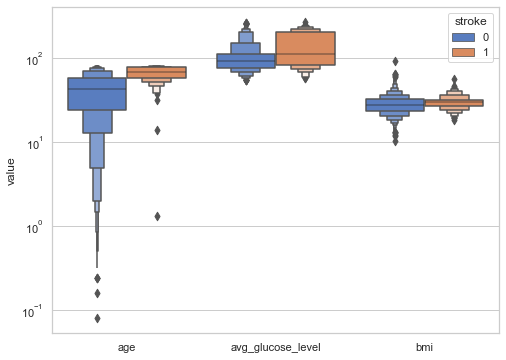

In [47]:
maggies_explore.explore_multivariate(train, 
                                     target, 
                                     cat_cols, 
                                     quant_cols)